In [54]:
import matplotlib.pyplot as plt
import pandas
import os
import matplotlib
import seaborn as sns
import numpy as np
% matplotlib inline
matplotlib.rcParams['figure.figsize'] = [12,6]
results = pandas.read_csv('/home/pc517/ga-dist/distributed/logs/2018:05:12-11:43:12/KangarooNoFrameskip-v4/6/resim_last_muts/resim_results.csv')

In [2]:
results.columns

In [3]:
worker_ids = list(set(results["worker_id"]))
worker_idxs = dict(zip(worker_ids, range(len(worker_ids))))
valid_results = results[results.is_valid]
invalid_results = results[results.is_valid!= True]
invalid_evals = invalid_results[invalid_results.is_eval]
invalid_muts = invalid_results[invalid_results.is_eval!=True]
valid_muts = valid_results[valid_results["is_eval"] == False]
valid_evals = valid_results[valid_results["is_eval"] == True]
print("there are {} unique worker ids".format(len(worker_ids)))

there are 25 unique worker ids


In [12]:
min_pw = min([len(a) for i, a in valid_muts.groupby("worker_id")])
max_pw = max([len(a) for i, a in valid_muts.groupby("worker_id")])
print("min_pw = {}, max_pw = {}".format(min_pw, max_pw))
print(len(invalid_results))
print(len(valid_evals))
print("There are {} valid mutations".format(len(valid_muts)))


min_pw = 32, max_pw = 47
4
0
There are 1000 valid mutations


In [35]:
first_25_pw=valid_muts.sort_values(by="finish_time").groupby("worker_id").head(25)
for wid in worker_ids:
    assert len(first_25_pw[first_25_pw["worker_id"]==wid])==25
worker_nls = valid_muts[valid_muts["worker_id"]==worker_ids[0]]["noise_list"]
unique_nls = set(worker_nls)
print("There are {} nls and {} unique".format(len(worker_nls), len(unique_nls)))

There are 43 nls and 43 unique


/home/pc517/anaconda3/envs/ga/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Single worker length histogram')

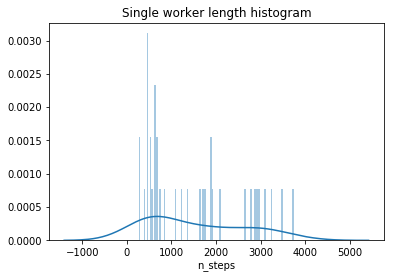

In [36]:
sns.distplot(valid_muts[valid_muts["worker_id"]==worker_ids[2]]["n_steps"], bins= 100)
plt.title("Single worker length histogram")

/home/pc517/anaconda3/envs/ga/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'All workers, first 25 lengths')

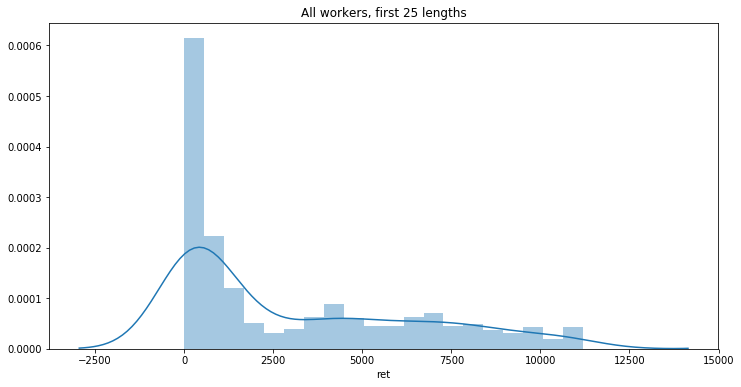

In [59]:
sns.distplot(first_25_pw["ret"], bins=20)
plt.title("All workers, first 25 lengths")

In [65]:
h,edges = np.histogram(first_25_pw["ret"], bins=20)
edges

array([     0.,    560.,   1120.,   1680.,   2240.,   2800.,   3360.,
         3920.,   4480.,   5040.,   5600.,   6160.,   6720.,   7280.,
         7840.,   8400.,   8960.,   9520.,  10080.,  10640.,  11200.])

700
Actual experiment, all lengths


/home/pc517/anaconda3/envs/ga/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


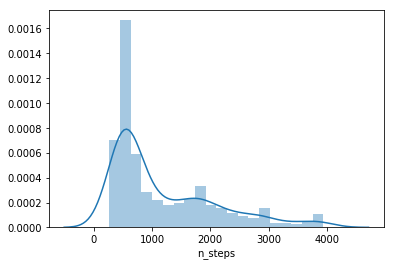

In [39]:
exp_results = pandas.read_csv('/home/pc517/ga-dist/distributed/logs/2018:05:12-11:43:12/KangarooNoFrameskip-v4/6/results.csv')
exp_worker_ids = list(set(exp_results["worker_id"]))
y = exp_results[lambda x: x["is_valid"]][lambda x: x["is_eval"]==False][lambda x: x["worker_gen"]==exp_results["worker_gen"].max()-1]
# z = y[lambda x: x["worker_id"]==exp_worker_ids[4]]
print(len(y))
sns.distplot(y["n_steps"], bins=20)
print("Actual experiment, all lengths")

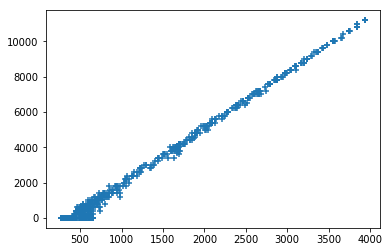

In [42]:
plt.scatter(first_25_pw["n_steps"],  first_25_pw["ret"], marker="+")

In [43]:
final_gen_num = exp_results["worker_gen"].max()
pg_num = final_gen_num - 1
penult_gen = exp_results[exp_results["worker_gen"]==pg_num]

valid_penults = penult_gen[penult_gen["is_valid"]]

valid_pen_muts = valid_penults[valid_penults["is_eval"]==False].sort_values(by="ret")
valid_pen_evals = valid_penults[valid_penults["is_eval"]].sort_values(by="ret")
# parent noise lists in final gen are the top results from this gen

cand_sums = valid_pen_evals[["noise_list", "ret"]].groupby("noise_list").sum()
elite_str = cand_sums.sort_values(by="ret").iloc[-1].name
parent_strs = set(list(valid_pen_muts.iloc[-20:]["noise_list"])+[elite_str])
final_gen= exp_results[exp_results["worker_gen"]==final_gen_num]
eval_strs = set(final_gen[final_gen["is_eval"]]["noise_list"])
for es in eval_strs:
    if not es in parent_strs:
        print("eval str NOT in parent_strs")
mut_strs = final_gen[final_gen["is_eval"]==False]["noise_list"]
for ms in mut_strs:
    parent_str = "-".join(ms.split("-")[:-1])
    if not parent_str in parent_strs:
        print("Truncated mut str NOT in parent_strs")

/home/pc517/anaconda3/envs/ga/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


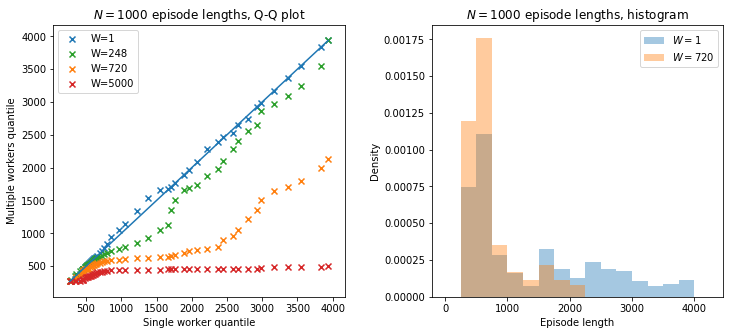

In [216]:
gen_size = 1000
fig, axes = plt.subplots(ncols=2, nrows = 1, figsize=(12,5))
lens = first_25_pw["n_steps"]
fig.subplots_adjust(wspace=0.3, hspace=0.3)

for n_workers, size, color in [(1, 2000, "tab:blue"),(248, 200, "tab:green"), (720,100, "tab:orange"), (5000,20, "tab:red")]:   
    resampled_lls = [np.random.choice(lens, size=size) for _ in range(n_workers)]
    cum_len_lists = [[sum(ll[:i])for i in range(1,len(ll)+1)] for ll in resampled_lls]
    final_sub_times =[cll[-1] for cll in cum_len_lists]
    len_submit_pairs = []
    for cll, ll in zip(cum_len_lists, resampled_lls):
        len_submit_pairs += zip(cll, ll)
        
    gen_pairs_sorted = sorted(len_submit_pairs, key=lambda x: x[0])[:gen_size]
    gen_t_end = gen_pairs_sorted[-1][0]
    if gen_t_end > min(final_sub_times):
        print("n_workers={}".format(n_workers))
        print("gen_t_end = {}  but minimum final submission time for a worker was {}".format(gen_t_end, min(final_sub_times)))
    gen_lens = [pair[1] for pair in gen_pairs_sorted[:gen_size]]
    if n_workers in[1, 720]:
        sns.distplot(gen_lens, ax=axes[1],bins = [250*x for x in range(18)], kde=False, label="$W={}$".format(n_workers), norm_hist=True, color=color)
        
    original_pctiles = np.percentile(lens, [2*x for x in range(51)])
    resampled_pctiles = np.percentile(gen_lens, [2*x for x  in range(51)])
    axes[0].scatter(x=original_pctiles, y=resampled_pctiles, marker="x", label="W={}".format(n_workers),linewidths=5, color=color)
axes[0].legend()
axes[0].plot(original_pctiles, original_pctiles)
axes[0].set_xlabel("Single worker quantile")
axes[0].set_ylabel("Multiple workers quantile")
axes[0].set_title("$N=1000$ episode lengths, Q-Q plot ")
# axes[0].set_xlim(200,500)
# axes[0].set_ylim(0,600)
# sns.distplot(lens, ax=axes[1],bins = [250*x for x in range(20)], kde=False, label="$W=1$", norm_hist=True,color="tab:blue")
axes[1].set_xlabel("Episode length")
axes[1].set_ylabel("Density")
axes[1].legend()
axes[1].set_title("$N=1000$ episode lengths, histogram")
# axes[1].ticklabel_format(style="sci", useMathText=False)
fig.subplots_adjust(wspace=0.3)

plt.savefig("/home/pc517/ga-dist/distributed/notebooks/len_comparisons", bbox_inches='tight')